# Exploratory Data Analysis  

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
from datetime import datetime
start=datetime(2006,1,1)
end=datetime(2016,1,1)

In [4]:
#df=pd.read_pickle('all_banks')
BAC = data.DataReader("BAC", 'yahoo', start, end)
C=data.DataReader("C", 'yahoo', start, end)
GS=data.DataReader("GS", 'yahoo', start, end)
JPM=data.DataReader("JPM", 'yahoo', start, end)
MS=data.DataReader("MS", 'yahoo', start, end)
WFC=data.DataReader("WFC", 'yahoo', start, end)

In [5]:
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,368.265533
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,361.466553
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,363.259796
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,363.259796
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,361.541199


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tickers=['BAC','C','GS','JPM','MS','WFC']

In [5]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.280807  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.916729  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.960411  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.909451  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.931290  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.364140  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.389069  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.488869  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.526283  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.912933  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.613142  
2006-01-04   31.799999  31.530001  10870000.0  20.374050  
2006-01-05   31.500000  31.495001  10158000.0  20.351437  
2006-01-06   31.580000  31.680000   8403800.0  20.470978  
2006-01-09   31.674999  31.674999   5619600.0  20.467749  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [7]:
#for tick in tickers:
# print(bank_stocks[tick]['Close'].max())
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [8]:
returns=pd.DataFrame()

In [9]:
for tick in tickers:
  returns[tick+'Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

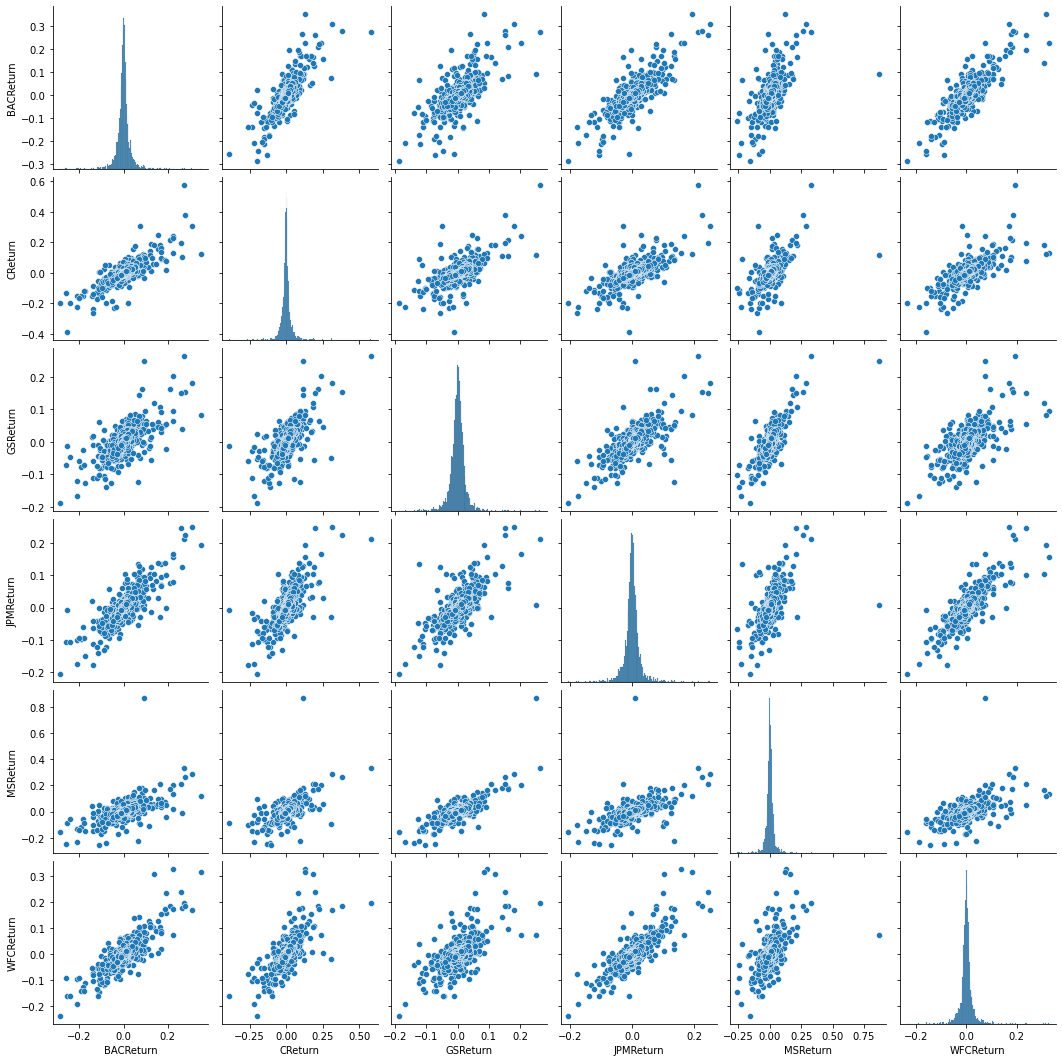

In [27]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [18]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [19]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [16]:
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [20]:
start=datetime(2015,1,1)
end=datetime(2015,12,31)
returns.loc[start:end].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

D:\anacon\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSReturn', ylabel='Density'>

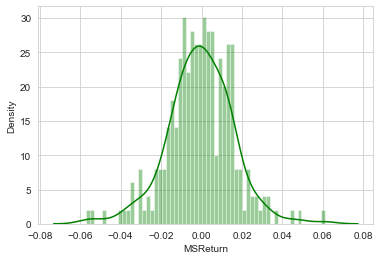

In [33]:
start=datetime(2015,1,1)
end=datetime(2015,12,31)
df=returns.loc[start:end]['MSReturn']
sns.set_style('whitegrid')
sns.distplot(df,bins=60,color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

D:\anacon\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CReturn', ylabel='Density'>

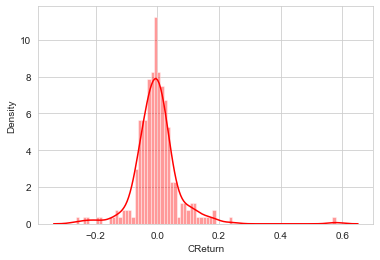

In [36]:
start=datetime(2008,1,1)
end=datetime(2008,12,31)
dff=returns.loc[start:end]['CReturn']
sns.distplot(dff,bins=60,color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<AxesSubplot:xlabel='Date'>

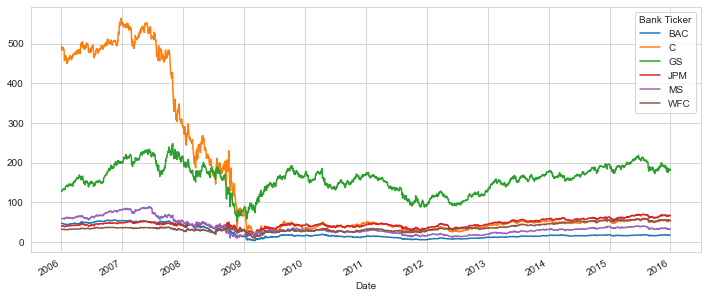

In [47]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot.line(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

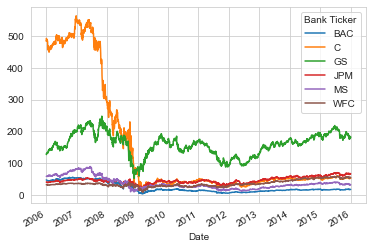

In [49]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot.line()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

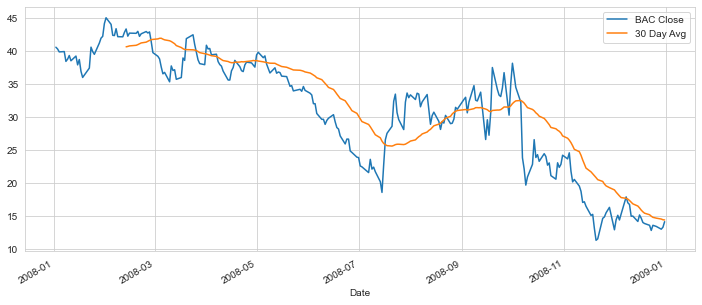

In [23]:
start=datetime(2008,1,1)
end=datetime(2008,12,31)
bank_stocks.loc[start:end]['BAC','Close'].plot.line(figsize=(12,5),label='BAC Close')
bank_stocks.loc[start:end]['BAC','Close'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

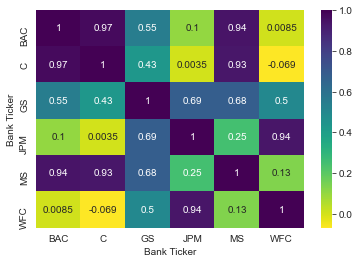

In [61]:
newdf=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
sns.heatmap(newdf,annot=True,cmap='viridis_r')

** Optional: Use seaborn's clustermap to cluster the correlations together:**

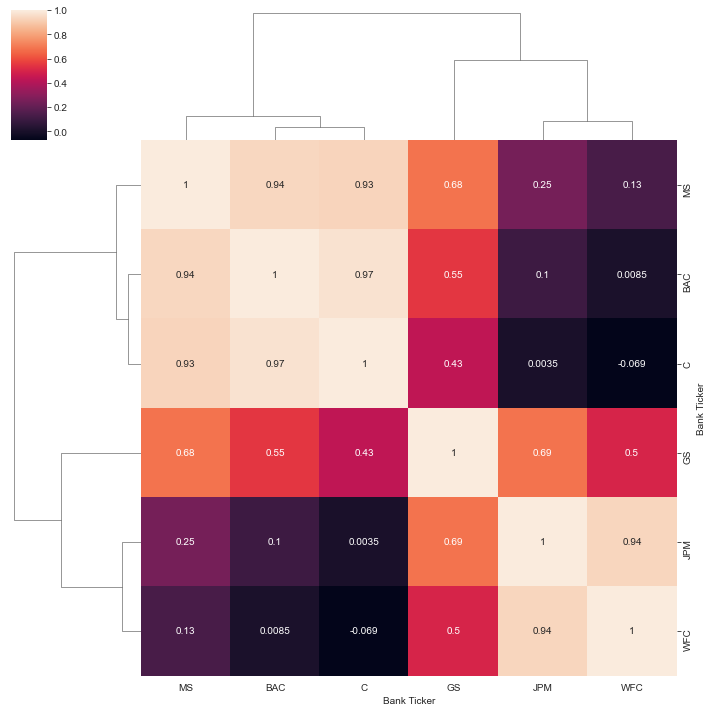

In [59]:
sns.clustermap(newdf,annot=True,cmap='rdylbu')

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [11]:
start=datetime(2015,1,1)
end=datetime(2016,1,1)
bank_stocks.loc[start:end]['BAC'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [19]:
start=datetime(2015,1,1)
end=datetime(2015,12,31)
#bank_stocks.loc[start:end]['MS'].iplot(kind='candle')
bank_stocks.loc[start:end]['MS','Close'].ta_plot(study='sma',periods=[21,50,100])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [14]:
start=datetime(2015,1,1)
end=datetime(2015,12,31)
bank_stocks.loc[start:end]['BAC','Close'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.